# Forest Fire analysis and prediction

- Data Collection
- Data Pre-Processing
- Exploratory Data Analysis
- Feature Engineering
- Feature Selection
- Model Building
- Model Selection
- Hyperparameter Tuning
- Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("./DATA/Algerian_forest_fires_dataset.csv")

In [3]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
data.shape

(247, 14)

In [5]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [6]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [7]:
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [8]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [10]:
data.day.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', nan,
       'Sidi-Bel Abbes Region Dataset', 'day'], dtype=object)

In [11]:
data[data.isnull().any(axis=1)] # inorder to check the row which is having the missing values


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


# Here after 123 we have the data set of new region

In [12]:
data.loc[:122,'Region']=1  #upto 122 ,Region =1 but intialize as 1.0
data.loc[122:,'Region']=2  #After 122 , Region = 2 this as 2.0
data[['Region']] = data[['Region']].astype(int) #1.0 is coverted to 1 astype integer
#It is used to convert the data in the "Region" column of a pandas DataFrame to integer type.
data.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [13]:
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,2


In [14]:

data.drop([122,123,168], axis=0, inplace=True)#.reset_index(drop=True)
data.day.unique()
#  Drop rows at index labels 122 and 123,168


array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [15]:
filtered_rows = data[data['day'] == 'day']
filtered_rows


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [16]:
data.drop([124], axis=0, inplace=True)#.reset_index(drop=True)
data.day.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [17]:
data.shape

(243, 15)

In [18]:
data.month.unique()

array(['6', '7', '8', '9'], dtype=object)

In [19]:
data.year.unique()

array(['2012'], dtype=object)

In [20]:
data.columns.unique()

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [21]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [22]:
data.shape


(243, 15)

In [23]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [24]:
# Spaces were fixed in the column names
# The str.strip() function is applied to each column name using the str accessor, which allows you to perform string operations on the elements of a column.
# After applying the strip() function, the modified column names are assigned back to the data.columns attribute, updating the column names in the DataFrame.
data.columns = data.columns.str.strip()
data.columns 

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [25]:
data.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [26]:
data.reset_index()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
239,243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
240,244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [27]:
data.reset_index(drop=True, inplace=True)
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [28]:
# Check if the default index is in proper format without gaps
is_proper_index = data.index.equals(pd.RangeIndex(len(data)))

print(is_proper_index)

True


In [29]:
data.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [30]:
print(data.duplicated())
print(data[data.duplicated()])

0      False
1      False
2      False
3      False
4      False
       ...  
238    False
239    False
240    False
241    False
242    False
Length: 243, dtype: bool
Empty DataFrame
Columns: [day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []


In [31]:
data.shape

(243, 15)

### ANALYSE

In [32]:
data.describe(include = 'all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243.000000
unique,31,4,1,19,62,18,39,173,165,197,106,173,125,8,NaN
top,1,8,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,NaN
freq,8,62,243,29,10,43,133,7,5,5,8,5,12,131,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.497942
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.501028
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


In [33]:
data["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

our dependent feature(Classes) containig only two categories but due to misspace it is showing multiple category so need to change the spaceing in order to make two category

In [34]:
data.Classes = data.Classes.str.strip()

In [35]:
data["Classes"].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [36]:
data["Region"].value_counts()

1    122
2    121
Name: Region, dtype: int64

In [37]:
data.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243.000000
unique,31,4,1,19,62,18,39,173,165,197,106,173,125,2,NaN
top,1,8,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,NaN
freq,8,62,243,29,10,43,133,7,5,5,8,5,12,137,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.497942
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.501028
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


In [38]:
data[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']] = data[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

objects = [features for features in data.columns if data[features].dtypes == 'O']  #"o" object type
for i in objects:
    if i != 'Classes':  #exxcept classes
        data[i] = data[i].astype(float)


In [39]:
print(data.dtypes)

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object


In pandas, the object data type is commonly used to represent categorical data. While the object data type can also be used to store other types of data (such as strings), it is often used to represent variables with a limited number of discrete categories or labels.

In [40]:
data.describe(include="all")

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243,243.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,NaN
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,NaN,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,NaN,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,NaN,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,NaN,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,NaN,2.000000


In [41]:
data[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


In [42]:
data[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [43]:

# Encoding Not fire as 0 and Fire as 1
data['Classes']= np.where(data['Classes']== 'not fire',0,1)
data.head(10)
#If the condition is true, 
# the corresponding element in the 'Classes' column is assigned the value 0.
#  Otherwise, it is assigned the value 1.

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


In [44]:
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,2


In [45]:
# Check counts
data.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [46]:
correlation = data.corr()
correlation

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


The value of correlation helps in determining the strength and direction of the relationship between two variables. When using correlation for feature selection, the value of correlation can guide you in selecting relevant features

# Visualize

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

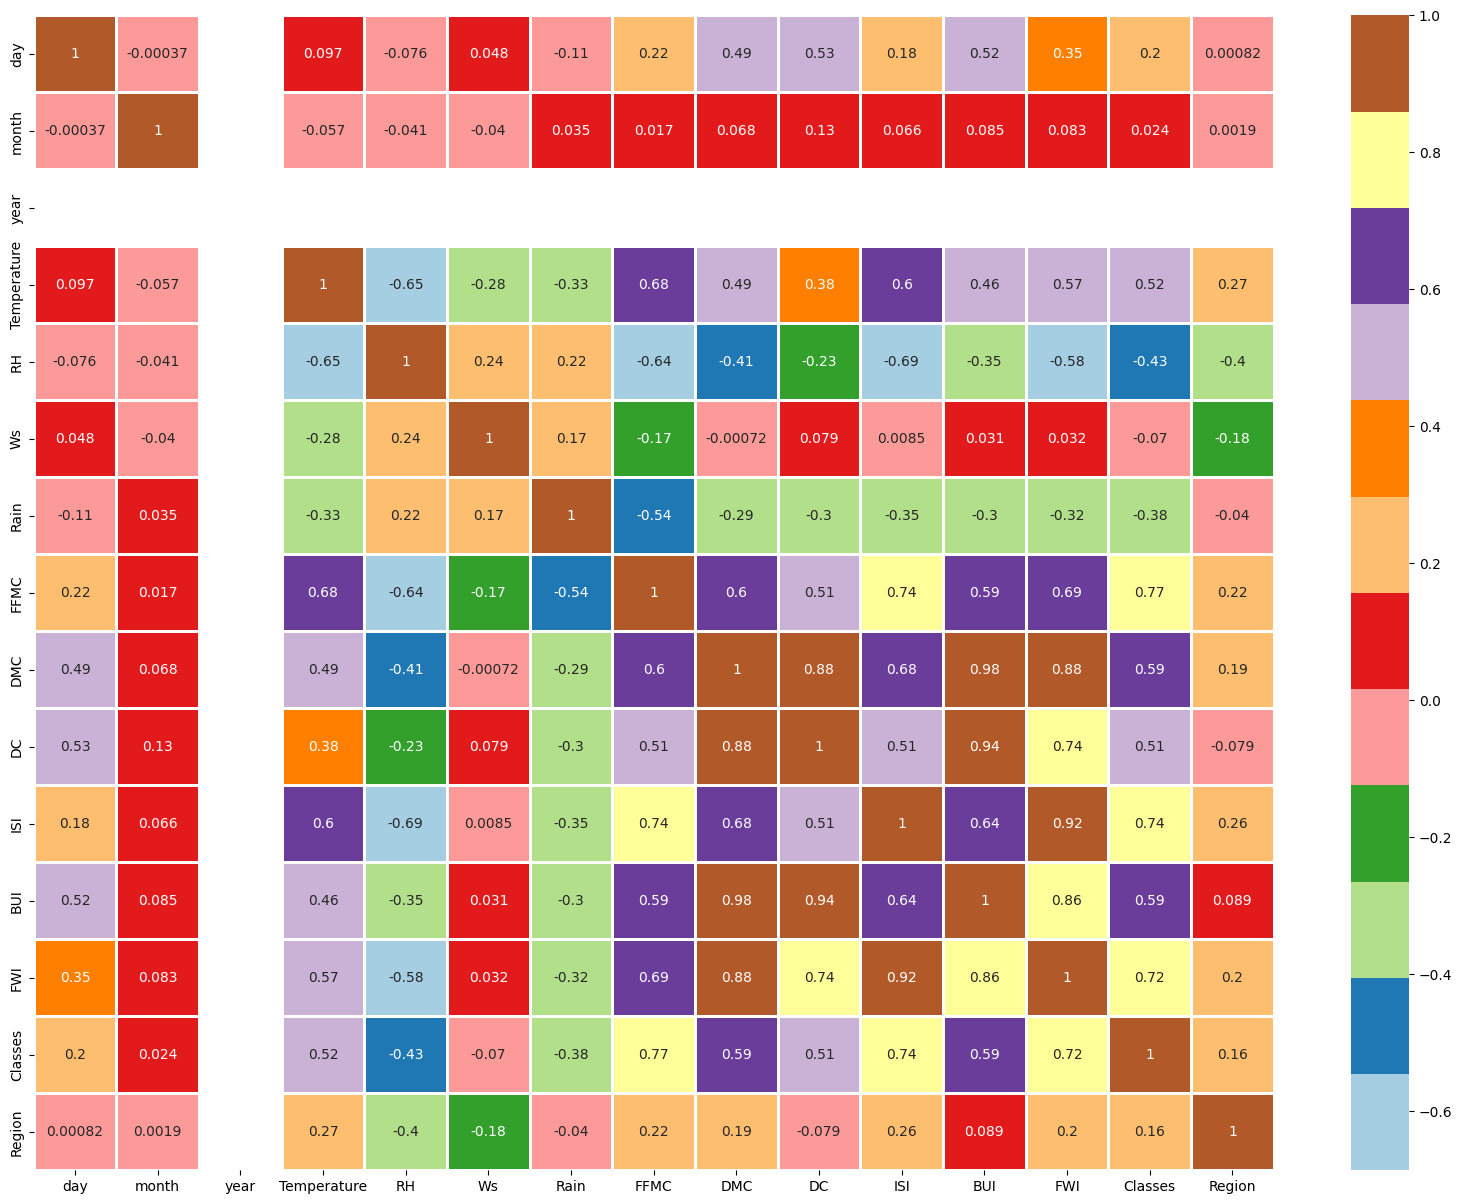

In [48]:
plt.figure(figsize=(20,15))  #size of figure
sns.heatmap(correlation,annot= True,linewidths=1, linecolor="white", cbar=True, cmap = "Paired",xticklabels="auto", yticklabels="auto")
     

In [49]:
data.to_csv('./DATA/ForestFireDataCleaned.csv', index=False)

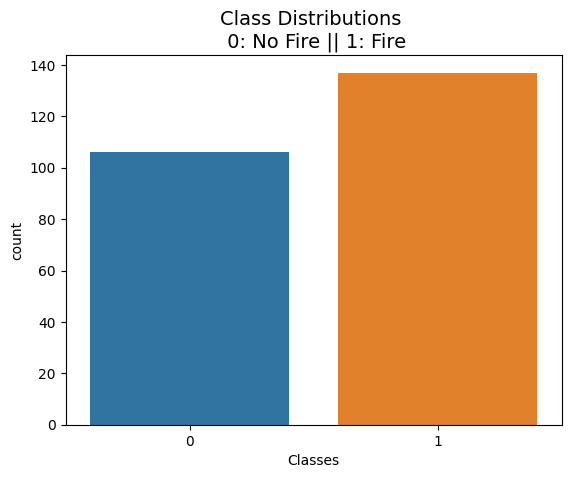

In [50]:


sns.countplot(x='Classes',data=data)
plt.title('Class Distributions \n 0: No Fire || 1: Fire', fontsize=14)
plt.show()

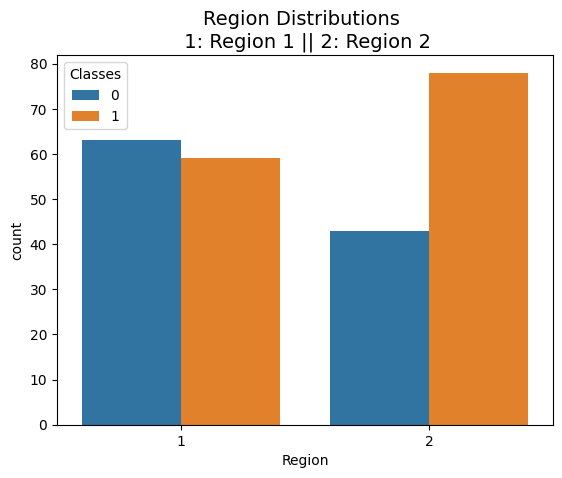

In [51]:
sns.countplot(x='Region',hue='Classes',data=data)
plt.title('Region Distributions \n 1: Region 1 || 2: Region 2', fontsize=14)
plt.show()

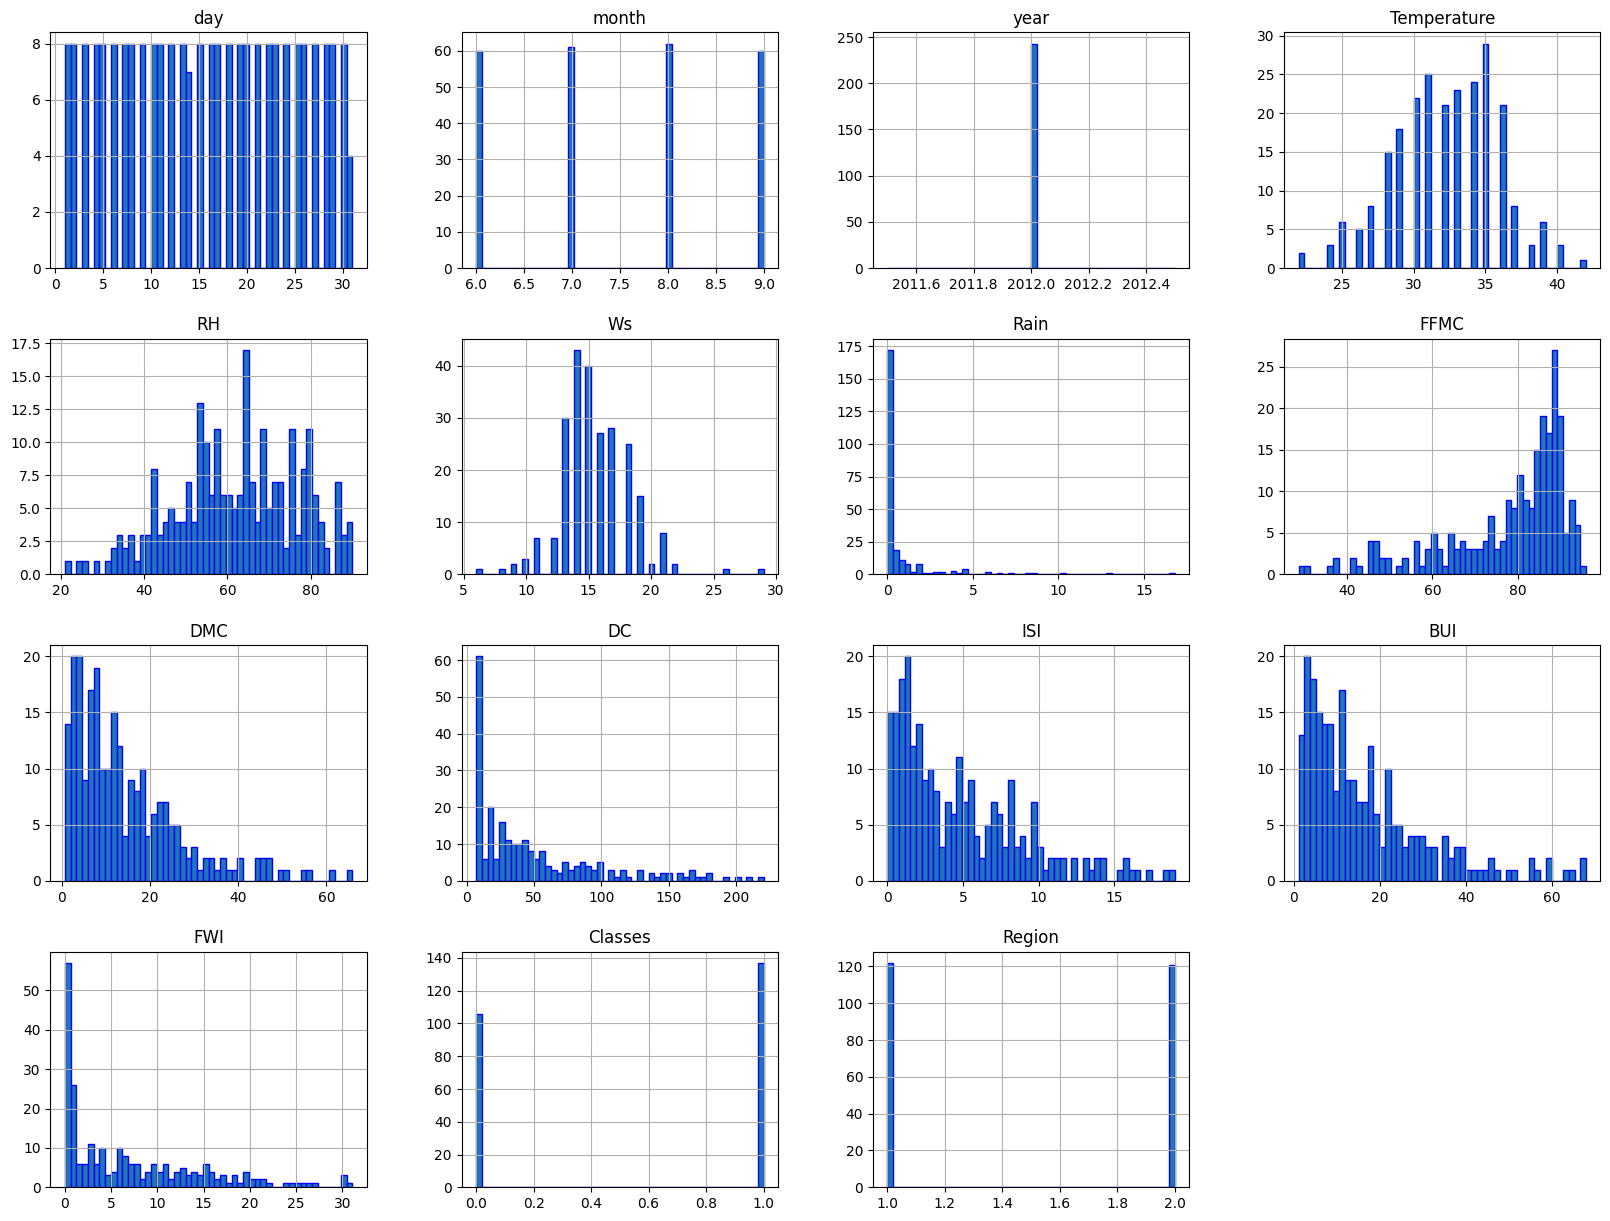

In [52]:
# PLot density plot for all features
#plt.style.use('seaborn')
data.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

Text(0.5, 1.0, 'Class Distribution \n 0: No Fire || 1: Fire')

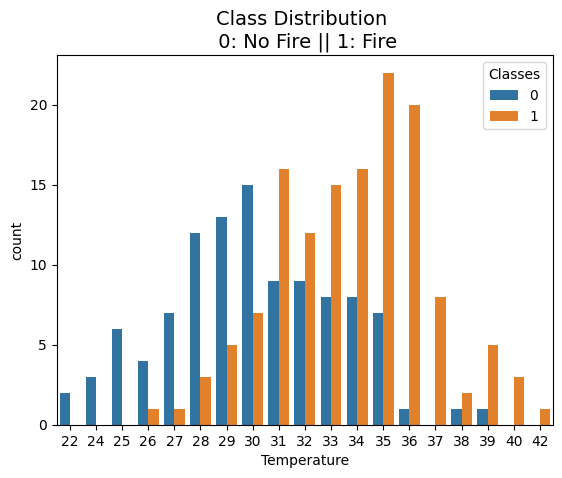

In [53]:
# countplot over target variable

sns.countplot(x='Temperature',hue='Classes', data=data)
plt.title('Class Distribution \n 0: No Fire || 1: Fire', fontsize=14)

In [54]:
data.month.unique()

array([6, 7, 8, 9])

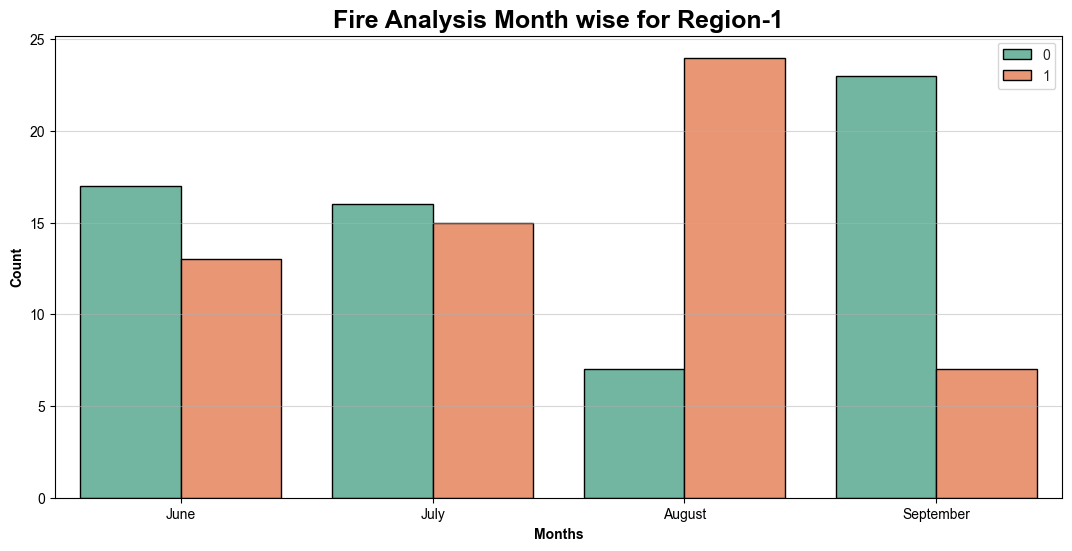

In [55]:
#month wise fire analysis for region 1
dftemp= data.loc[data['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= dftemp,ec = 'black', palette= 'Set2')#ec='black' sets the edge color of the categorical plot elements to black, and palette='Set2' sets the color palette to the 'Set2' palette.
plt.title('Fire Analysis Month wise for Region-1', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

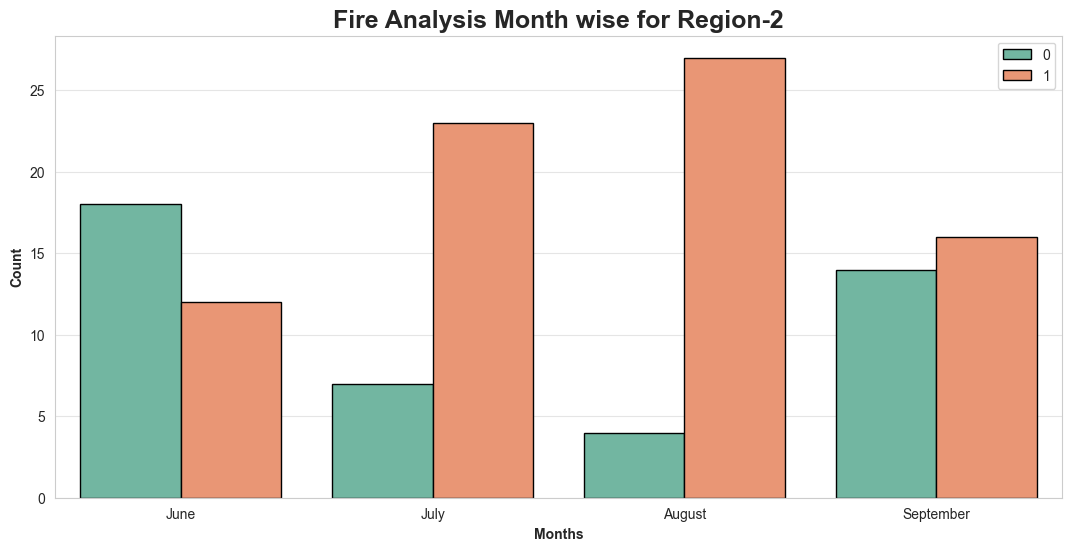

In [56]:
#month wise fire analysis for region 2
dftemp= data.loc[data['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= dftemp,ec = 'black', palette= 'Set2')#ec='black' sets the edge color of the categorical plot elements to black, and palette='Set2' sets the color palette to the 'Set2' palette.
plt.title('Fire Analysis Month wise for Region-2', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

Yearly plot

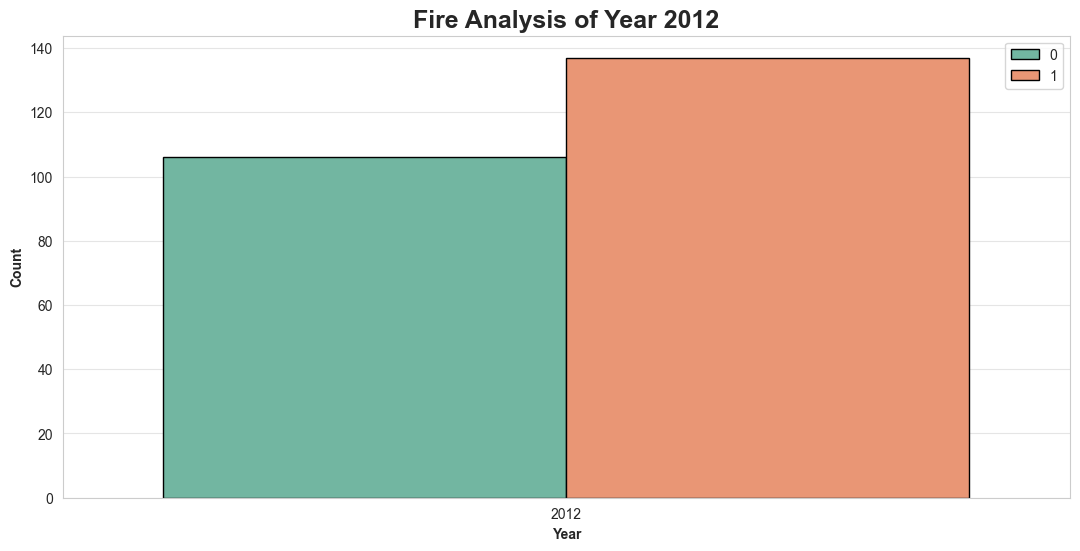

In [57]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='year',hue='Classes',data= data,ec = 'black', palette= 'Set2')#ec='black' sets the edge color of the categorical plot elements to black, and palette='Set2' sets the color palette to the 'Set2' palette.
plt.title('Fire Analysis of Year 2012', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Year', weight= 'bold')
plt.legend(loc='upper right')
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

In [58]:
# ! pip install scikit-learn


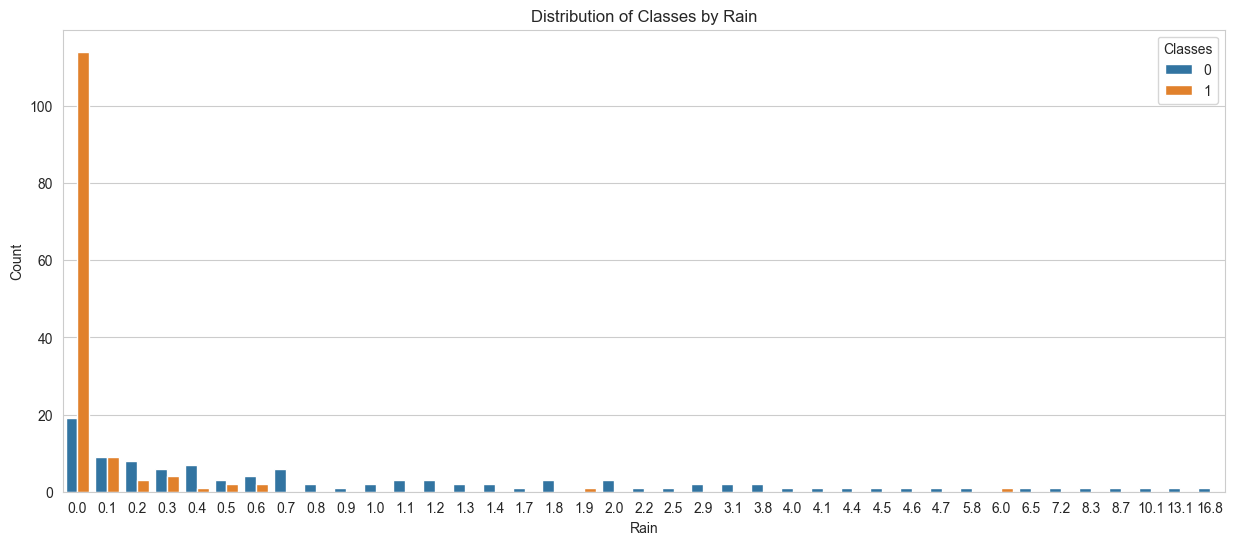

In [59]:
plt.subplots(figsize=(15,6))
sns.set_style('whitegrid')
sns.countplot(x='Rain', hue='Classes', data=data)

# Set the labels and title
plt.xlabel('Rain')
plt.ylabel('Count')
plt.title('Distribution of Classes by Rain')

# Show the plot
plt.show()

### With the increase in Rain Fire chance is descreases

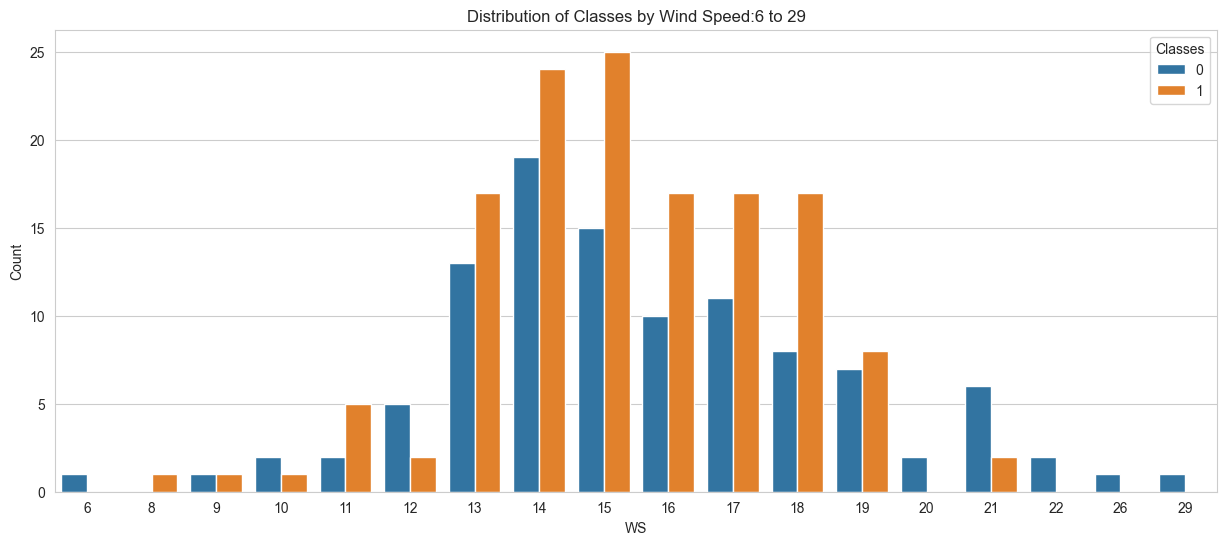

In [60]:
plt.subplots(figsize=(15,6))
sns.set_style('whitegrid')
sns.countplot(x='Ws', hue='Classes', data=data)

# Set the labels and title
plt.xlabel('WS')
plt.ylabel('Count')
plt.title('Distribution of Classes by Wind Speed:6 to 29')

# Show the plot
plt.show()

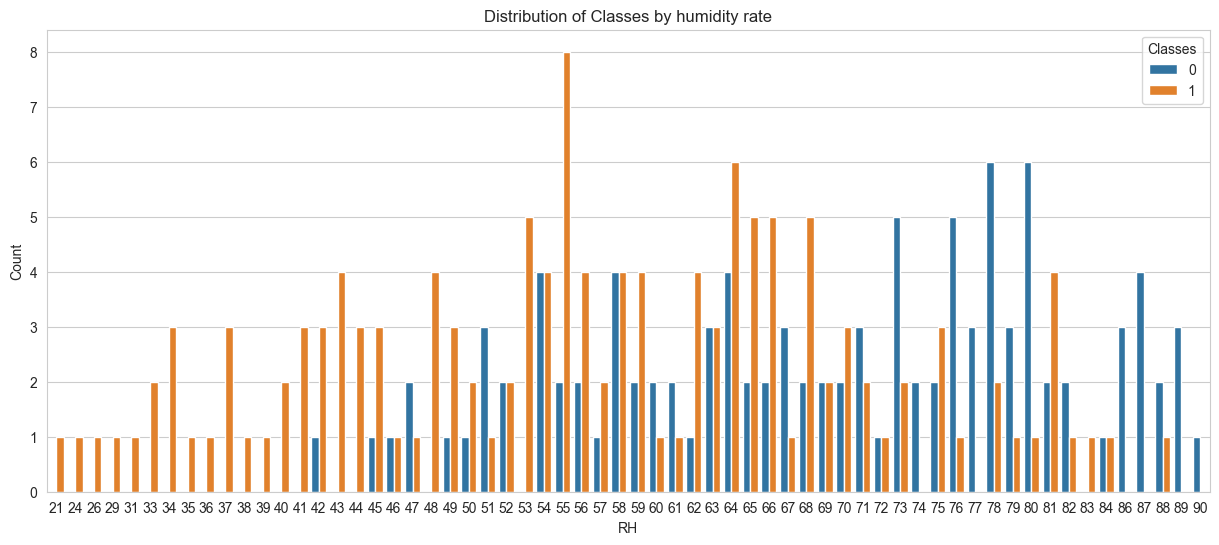

In [61]:
plt.subplots(figsize=(15,6))
sns.set_style('whitegrid')
sns.countplot(x='RH', hue='Classes', data=data)

# Set the labels and title
plt.xlabel('RH')
plt.ylabel('Count')
plt.title('Distribution of Classes by humidity rate')

# Show the plot
plt.show()

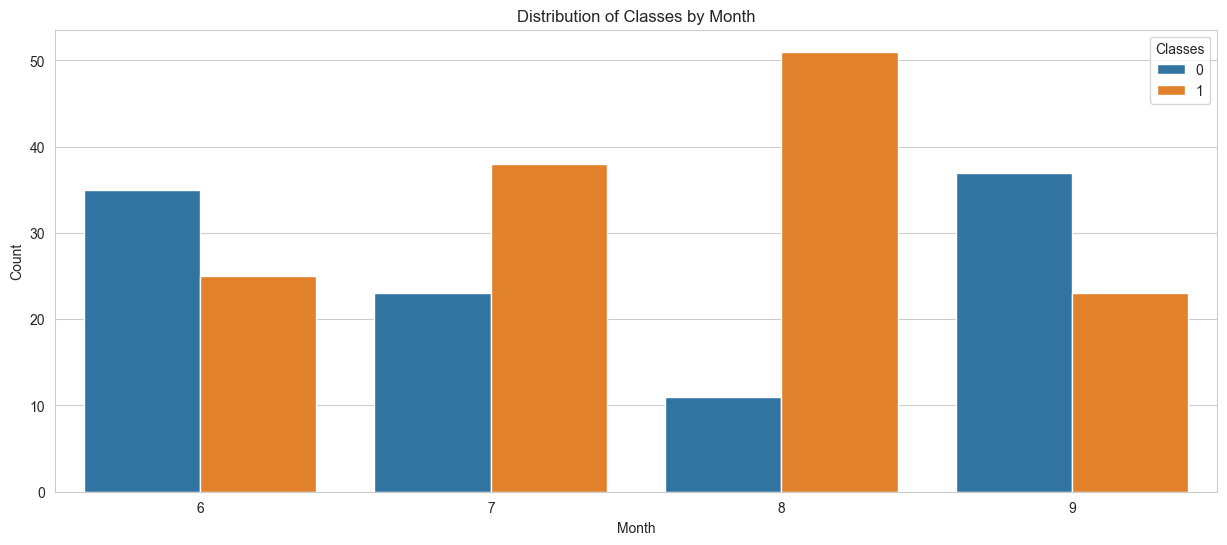

In [62]:
plt.subplots(figsize=(15,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=data)

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Classes by Month')

# Show the plot
plt.show()

In [63]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming 'data' is the DataFrame containing the dataset
# Splitting the features and target variable
X = data.drop('Classes', axis=1)
y = data['Classes']

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Display the correlation matrix
print(correlation_matrix)

# Train a Random Forest classifier
rfmodel = RandomForestClassifier()
rfmodel.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rfmodel.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display feature importances
print(feature_importances)

                  day     month  year  Temperature        RH        Ws  \
day          1.000000 -0.000369   NaN     0.097227 -0.076034  0.047812   
month       -0.000369  1.000000   NaN    -0.056781 -0.041252 -0.039880   
year              NaN       NaN   NaN          NaN       NaN       NaN   
Temperature  0.097227 -0.056781   NaN     1.000000 -0.651400 -0.284510   
RH          -0.076034 -0.041252   NaN    -0.651400  1.000000  0.244048   
Ws           0.047812 -0.039880   NaN    -0.284510  0.244048  1.000000   
Rain        -0.112523  0.034822   NaN    -0.326492  0.222356  0.171506   
FFMC         0.224956  0.017030   NaN     0.676568 -0.644873 -0.166548   
DMC          0.491514  0.067943   NaN     0.485687 -0.408519 -0.000721   
DC           0.527952  0.126511   NaN     0.376284 -0.226941  0.079135   
ISI          0.180543  0.065608   NaN     0.603871 -0.686667  0.008532   
BUI          0.517117  0.085073   NaN     0.459789 -0.353841  0.031438   
FWI          0.350781  0.082639   NaN 

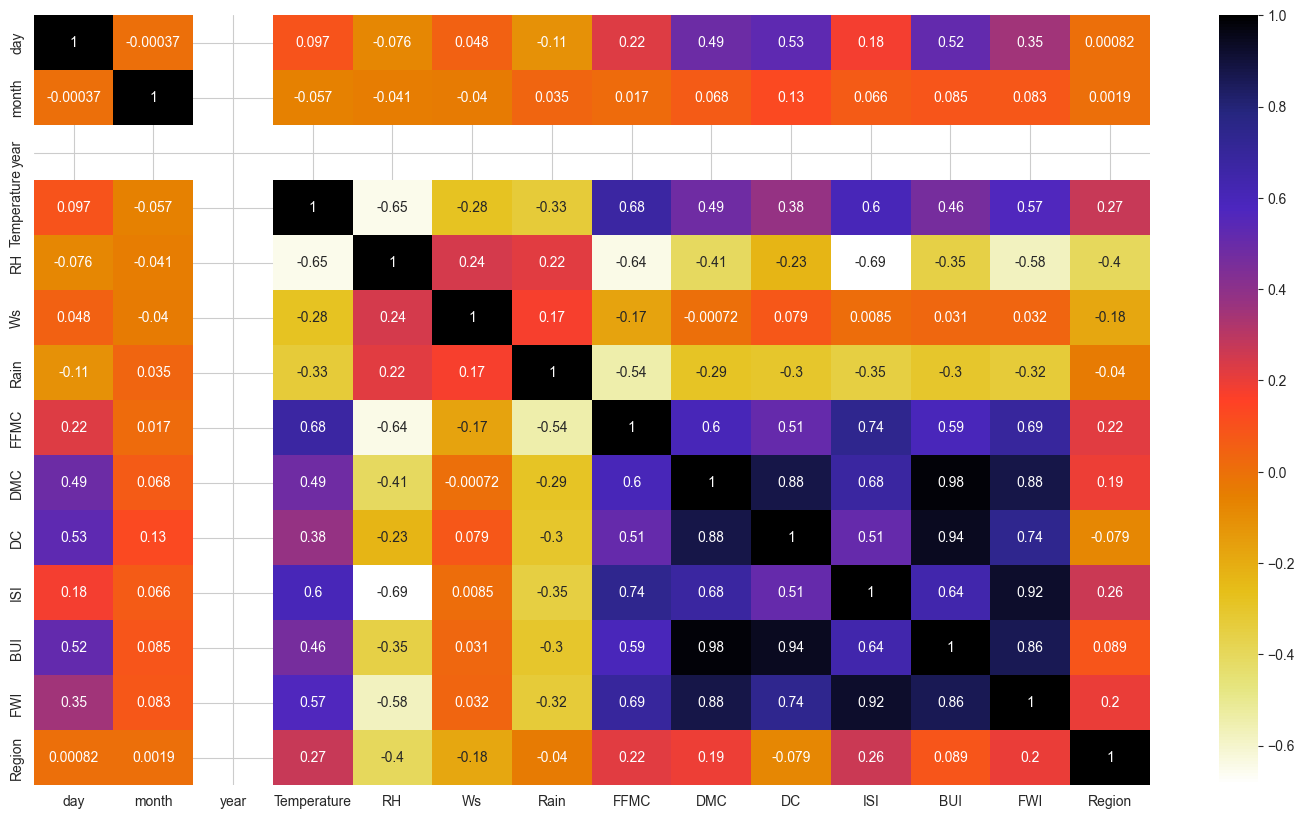

In [64]:
plt.subplots(figsize=(18,10))

sns.heatmap(correlation_matrix , annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

From above anlysis  we find some non importance features:
- Year (due to missing values)
- Ws (wind speed) low correlation
- DAY(low corr)
- Month(low corr)

In [65]:
df = data.drop(['day','month','year','Ws'], axis=1)
df.head(10)

,Temperature,RH,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,31,67,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,33,54,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,30,73,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,25,88,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,28,79,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


Spliting Data Set 

In [66]:
from sklearn.model_selection import train_test_split


In [67]:

y = df['Classes']
X = df.drop('Classes',axis=1)
y.tail()

238    1
239    0
240    0
241    0
242    0
Name: Classes, dtype: int32

In [68]:
X.head()

,Temperature,RH,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,29,61,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,26,82,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,25,89,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,27,77,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1


In [69]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.head()

,Temperature,RH,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
226,28,81,0.0,84.6,12.6,41.5,4.3,14.3,5.7,2
65,34,65,0.0,86.8,11.1,29.7,5.2,11.5,6.1,1
168,33,68,0.0,86.1,23.9,51.6,5.2,23.9,9.1,2
206,34,40,0.0,92.1,56.3,157.5,14.3,59.5,31.1,2
144,33,59,0.8,74.2,7.0,8.3,1.6,6.7,0.8,2


In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 226 to 102
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  162 non-null    int32  
 1   RH           162 non-null    int32  
 2   Rain         162 non-null    float64
 3   FFMC         162 non-null    float64
 4   DMC          162 non-null    float64
 5   DC           162 non-null    float64
 6   ISI          162 non-null    float64
 7   BUI          162 non-null    float64
 8   FWI          162 non-null    float64
 9   Region       162 non-null    int32  
dtypes: float64(7), int32(3)
memory usage: 12.0 KB


In [71]:
del data,X,y,df

In [72]:
from sklearn.model_selection import GridSearchCV
#TRain Function is defined
def train(X_train, y_train, model, hyperparameters):
    grid_search = GridSearchCV(estimator=model,param_grid=hyperparameters, cv = 5)
    grid_search.fit(X_train, y_train)
    
    
    #print the best hyperparameters found
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)
    
    # Train the model with best hyperparametres
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)

    # Print the intercept and coefficients of the best model
#     print('Intercept:', best_model.intercept_)
#     print('Coefficients:', best_model.coef_)

    # Evaluate the best model on the test data
    scores = best_model.score(X_test, y_test)
    print('Score_test_data:', scores)
    
    return best_params, best_model

In [73]:
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

# EVALUATION

def evaluate_model(X_test, y_test, best_model):
    # it will evaluate the score by taking testing data with best model
    
    #predict the target values for the best set
    y_pred = best_model.predict(X_test)
    
    # Calculate the MSE
    mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared
    r2 = r2_score(y_test, y_pred)

# Calculate the adjusted R-squared
    # adjusted_r2 = adjusted_r2_score(y_test, y_pred)

# Calculate the MAE
    mae = mean_absolute_error(y_test, y_pred)

# Print the scores
    print("MSE:", mse)
    print("R-squared:", r2)
    # print("Adjusted R-squared:", adjusted_r2)
    print("MAE:", mae)

    return mse,r2,mae


# Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
# Define the hyperparameters to tune
hyperparameters = {
    # "regularization": ["l1", "l2"],
    # "learning_rate": [0.01, 0.001, 0.0001],
    # "number_of_epochs": [10, 50, 100],
}
model = LinearRegression()
_,best_model = train(X_train,y_train,model,hyperparameters)
# print('Intercept is :',best_model.intercept_)
# print('Coefficient is :',best_model.coef_)
scores = evaluate_model(X_test,y_test,best_model)    

Best Hyperparameters: {}
Score_test_data: 0.6840775270198252
MSE: 0.07627209224212729
R-squared: 0.6840775270198252
MAE: 0.23726145381780567


# Ridge(L2)

In [75]:
from sklearn.linear_model import Ridge
# Define the hyperparameters to tune
hyperparameters = {
    "alpha": np.logspace(-4, 4, 10),
}

# Create a Ridge model
model = Ridge()
_,best_model = train(X_train,y_train,model,hyperparameters)
scores = evaluate_model(X_test,y_test,best_model)   



Best Hyperparameters: {'alpha': 166.81005372000558}
Score_test_data: 0.6753837888234437
MSE: 0.07837099199872964
R-squared: 0.6753837888234437
MAE: 0.24206950042768569


# Lasso(L1)

In [76]:
from sklearn.linear_model import Lasso
# Define the hyperparameters to tune
hyperparameters = {
    "alpha": np.logspace(-4, 4, 10),
}

# Create a Lasso model
model = Lasso()
_,best_model = train(X_train,y_train,model,hyperparameters)
scores = evaluate_model(X_test,y_test,best_model)   



C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.299e+00, tolerance: 3.169e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.390e+00, tolerance: 3.192e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

Best Hyperparameters: {'alpha': 0.046415888336127774}
Score_test_data: 0.6695115483312191
MSE: 0.07978870712442448
R-squared: 0.6695115483312191
MAE: 0.2448009095646445


# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeRegressor
# Define the hyperparameters to tune
hyperparameters = {
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
}

# Create a decision tree regressor
model = DecisionTreeRegressor()
_,best_model = train(X_train,y_train,model,hyperparameters)
scores = evaluate_model(X_test,y_test,best_model)   



Best Hyperparameters: {'max_depth': 3, 'min_samples_split': 5}
Score_test_data: 0.9861363636363636
MSE: 0.0033470507544581607
R-squared: 0.9861363636363636
MAE: 0.0139917695473251


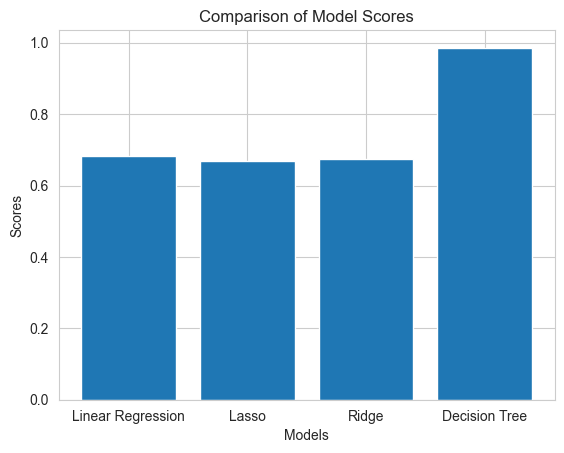

In [78]:
import matplotlib.pyplot as plt

# Scores of each model
linear_score = 0.6840775270198252
lasso_score = 0.6695115483312191  
ridge_score = 0.6753837888234437
decision_tree_score = 0.9861363636363636

# Models names
models = ['Linear Regression', 'Lasso', 'Ridge', 'Decision Tree']

# Scores for each model
scores = [linear_score, lasso_score, ridge_score, decision_tree_score]

# Plotting the scores
plt.bar(models, scores)
plt.title('Comparison of Model Scores')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.show()

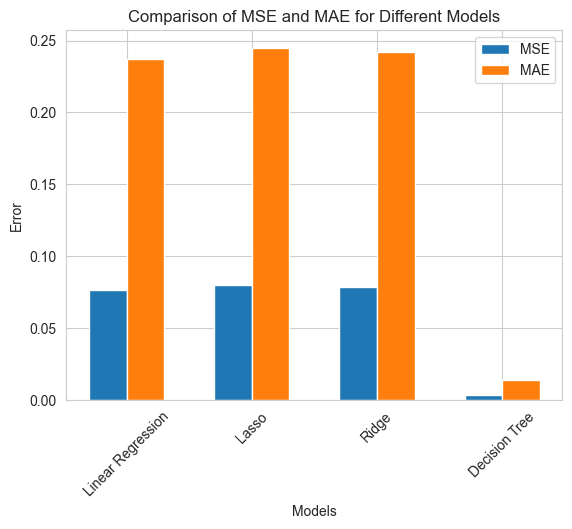

In [79]:
# Plot the MSE values
linear_mse = 0.07627209224212729
lasso_mse = 0.07978870712442448
ridge_mse = 0.07837099199872964
tree_mse =   0.0033470507544581607
#plot the mae values
linear_mae = 0.23726145381780567
lasso_mae =  0.2448009095646445
ridge_mae =  0.24206950042768569
tree_mae =  0.0139917695473251

models = ['Linear Regression', 'Lasso', 'Ridge', 'Decision Tree']
mse_values = [linear_mse, lasso_mse, ridge_mse, tree_mse]
mae_values = [linear_mae, lasso_mae, ridge_mae, tree_mae]

# Set the width of the bars
bar_width = 0.3
# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
# Plot the MSE values as a bar graph
plt.bar(r1, mse_values, width=bar_width, label='MSE')  # r1 is the position
# Plot the MAE values as a bar graph
plt.bar(r2, mae_values, width=bar_width, label='MAE')  #r2 is also position after r1

plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Comparison of MSE and MAE for Different Models')
plt.xticks([r + bar_width/2 for r in range(len(models))], models, rotation=45)
plt.legend()
plt.show()